Generated Text:
Team 4 AIE A


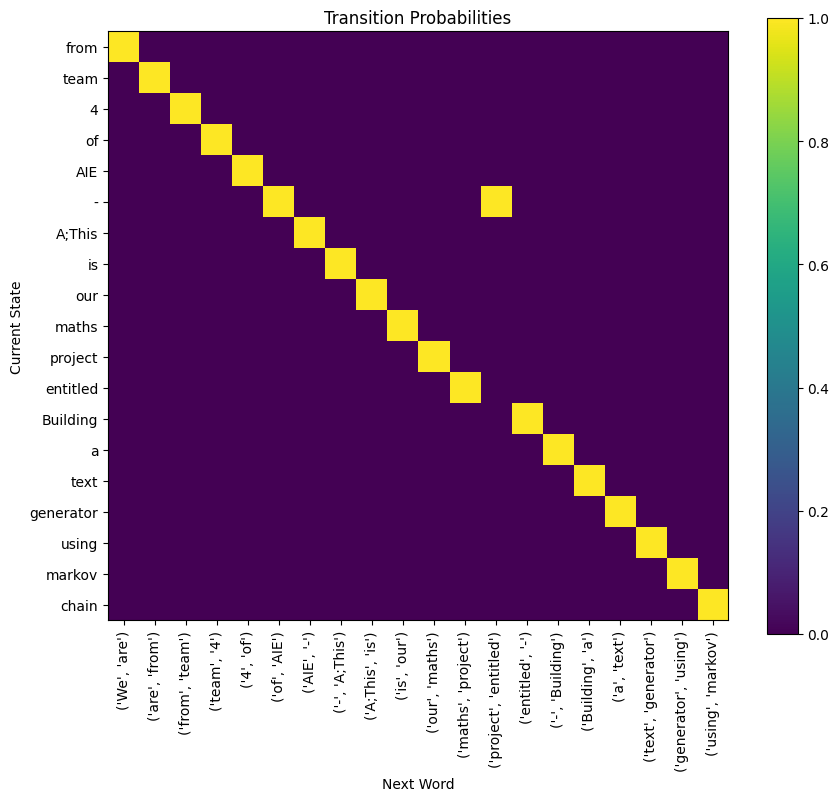

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

class MarkovChainTextGenerator:
    def __init__(self, order=1):
        self.order = order
        self.transitions = {}

    def train(self, text):
        words = text.split()
        for i in range(len(words) - self.order):
            current_state = tuple(words[i:i + self.order])
            next_word = words[i + self.order]

            if current_state not in self.transitions:
                self.transitions[current_state] = {}

            if next_word not in self.transitions[current_state]:
                self.transitions[current_state][next_word] = 1
            else:
                self.transitions[current_state][next_word] += 1

    def generate_text(self, length=100, seed=None):
      if seed is None:
        current_state = random.choice(list(self.transitions.keys()))
      else:
        current_state = tuple(seed)

      generated_text = list(current_state)

      for _ in range(length):
        if current_state not in self.transitions:
          break  # Exit loop if the current state is not in transitions

        next_word = random.choices(
            list(self.transitions[current_state].keys()),
            weights=list(self.transitions[current_state].values())
        )[0]

        generated_text.append(next_word)
        current_state = tuple(generated_text[-self.order:])

      return ' '.join(generated_text)


# Example usage
corpus = "We are from team 4 of AIE - A;This is our maths project entitled - Building a text generator using markov chain"

# Initialize and train the Markov Chain Text Generator
markov_generator = MarkovChainTextGenerator(order=2)
markov_generator.train(corpus)

# Generate text
generated_text = markov_generator.generate_text(length=50, seed=("Team 4", "AIE A"))

# Print generated text
print("Generated Text:")
print(generated_text)

# Plot transition probabilities
def plot_transitions(transitions):
    df = pd.DataFrame(transitions).fillna(0)
    plt.figure(figsize=(10, 8))
    plt.imshow(df.values, interpolation='nearest', cmap='viridis')
    plt.xticks(range(len(df.columns)), df.columns, rotation=90)
    plt.yticks(range(len(df.index)), df.index)
    plt.xlabel('Next Word')
    plt.ylabel('Current State')
    plt.title('Transition Probabilities')
    plt.colorbar()
    plt.show()

# Plot the transition probabilities
plot_transitions(markov_generator.transitions)

SIMPLE RNN MODEL AND MARKOV TEXT GENERATION

In [ ]:
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample corpus
corpus = "We are from team 4 of AIE - A;This is our maths project entitled - Building a text generator using markov chain"

# Tokenize the corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels
input_sequences = []
for line in corpus.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
x, y = input_sequences[:, :-1], input_sequences[:, -1]
y = keras.utils.to_categorical(y, num_classes=total_words)

# Build a simple RNN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_length-1),
    keras.layers.LSTM(100),
    keras.layers.Dense(total_words, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100, verbose=0)

# Generate text using deep learning predictions followed by Markov Chain
seed_text = "team 4 of AIE - A"
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted_word_index = np.argmax(model.predict(token_list), axis=-1)
    predicted_word = tokenizer.index_word[predicted_word_index[0]]

    seed_text += " " + predicted_word

print("Generated Text (Deep Learning + Markov Chains):")
print(seed_text)

1/1 [==============================] - 0s 37ms/step
Generated Text (Deep Learning + Markov Chains):
team 4 of AIE - A of aie a this is our maths project entitled building


DEEP LEARNING BASED MARKOV CHAIN TEXT GENERATOR

1/1 [==============================] - 0s 24ms/step
Generated Text (Deep Learning + Markov Chains):
This


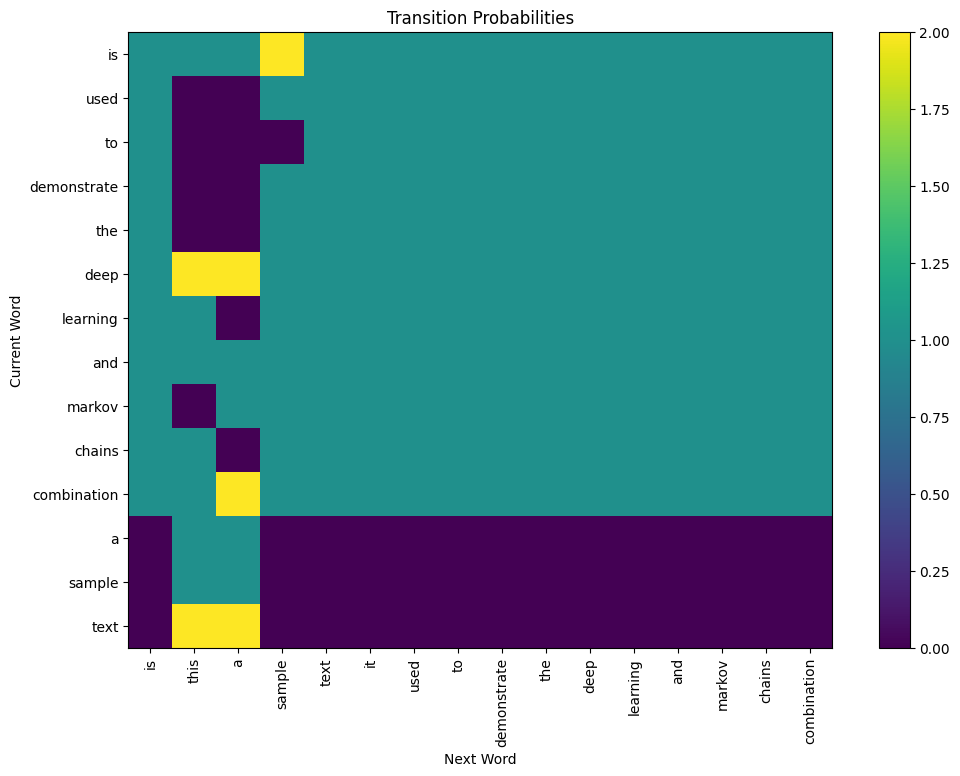

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

class TextGeneratorWithMarkovChains:
    def __init__(self):
        self.transitions = {}

    def train_markov_chain(self, corpus, sample_size=1000):
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts([corpus])
        total_words = len(tokenizer.word_index) + 1

        input_sequences = []
        for line in corpus.split('.'):
            token_list = tokenizer.texts_to_sequences([line])[0]
            for i in range(1, len(token_list)):
                n_gram_sequence = token_list[:i+1]
                input_sequences.append(n_gram_sequence)

        np.random.shuffle(input_sequences)
        input_sequences = input_sequences[:sample_size]

        max_sequence_length = max([len(seq) for seq in input_sequences])
        input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
        x, y = input_sequences[:, :-1], input_sequences[:, -1]
        y = keras.utils.to_categorical(y, num_classes=total_words)

        model = keras.Sequential([
            keras.layers.Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_length-1),
            keras.layers.LSTM(100),
            keras.layers.Dense(total_words, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x, y, epochs=100, verbose=0)

        # Record transition probabilities
        for word, index in tokenizer.word_index.items():
            if word not in self.transitions:
                self.transitions[word] = {}
            for next_word, next_index in tokenizer.word_index.items():
                seed_text = [word]
                for _ in range(max_sequence_length-1):
                    token_list = tokenizer.texts_to_sequences([seed_text])[0]
                    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
                    predicted_word_index = np.argmax(model.predict(token_list), axis=-1)
                    predicted_word = tokenizer.index_word[predicted_word_index[0]]
                    seed_text.append(predicted_word)
                    if predicted_word == next_word:
                        if next_word not in self.transitions[word]:
                            self.transitions[word][next_word] = 1
                        else:
                            self.transitions[word][next_word] += 1

    def generate_text(self, seed_text, next_words):
        generated_text = seed_text

        for _ in range(next_words):
            if seed_text in self.transitions:
                next_word = random.choices(
                    list(self.transitions[seed_text].keys()),
                    weights=list(self.transitions[seed_text].values())
                )[0]
                generated_text += " " + next_word
                seed_text = next_word
            else:
                break

        return generated_text

    def plot_transitions(self):
        df = pd.DataFrame(self.transitions).fillna(0)
        plt.figure(figsize=(12, 8))
        plt.imshow(df.values, interpolation='nearest', cmap='viridis')
        plt.xticks(range(len(df.columns)), df.columns, rotation=90)
        plt.yticks(range(len(df.index)), df.index)
        plt.xlabel('Next Word')
        plt.ylabel('Current Word')
        plt.title('Transition Probabilities')
        plt.colorbar()
        plt.show()

# Example usage
corpus = "This is a sample text. It is used to demonstrate the deep learning and Markov Chains combination."

text_generator = TextGeneratorWithMarkovChains()
text_generator.train_markov_chain(corpus, sample_size=500)

# Generate text using deep learning predictions followed by Markov Chain
generated_text = text_generator.generate_text("This", 50)
print("Generated Text (Deep Learning + Markov Chains):")
print(generated_text)

# Plot transition probabilities
text_generator.plot_transitions()

From provided source

In [1]:
#Generate the lookup table
def generateTable(data,k=4):

    T = {}
    for i in range(len(data)-k):
        X = data[i:i+k]
        Y = data[i+k]
        #print("X  %s and Y %s  "%(X,Y))

        if T.get(X) is None:
            T[X] = {}
            T[X][Y] = 1
        else:
            if T[X].get(Y) is None:
                T[X][Y] = 1
            else:
                T[X][Y] += 1

    return T

T = generateTable("hello hello helli")
print(T)

{'hell': {'o': 2, 'i': 1}, 'ello': {' ': 2}, 'llo ': {'h': 2}, 'lo h': {'e': 2}, 'o he': {'l': 2}, ' hel': {'l': 2}}


In [2]:
#Convert frequencies to probabilities
def convertFreqIntoProb(T):
    for kx in T.keys():
        s = float(sum(T[kx].values()))
        for k in T[kx].keys():
            T[kx][k] = T[kx][k]/s

    return T

T = convertFreqIntoProb(T)
print(T)

{'hell': {'o': 0.6666666666666666, 'i': 0.3333333333333333}, 'ello': {' ': 1.0}, 'llo ': {'h': 1.0}, 'lo h': {'e': 1.0}, 'o he': {'l': 1.0}, ' hel': {'l': 1.0}}


In [4]:
text_path = "train_corpus.txt"
def load_text(filename):
    with open(filename,encoding='utf8') as f:
        return f.read().lower()

text = load_text(text_path)
print('Loaded the dataset.')

Loaded the dataset.


In [5]:
def MarkovChain(text,k=4):
    T = generateTable(text,k)
    T = convertFreqIntoProb(T)
    return T

model = MarkovChain(text)
print('Model Created Successfully!')

Model Created Successfully!


In [6]:
import numpy as np

def sample_next(ctx,model,k):

    ctx = ctx[-k:]
    if model.get(ctx) is None:
        return " "
    possible_Chars = list(model[ctx].keys())
    possible_values = list(model[ctx].values())

    print(possible_Chars)
    print(possible_values)

    return np.random.choice(possible_Chars,p=possible_values)

sample_next("commo",model,4)

['n']
[1.0]


'n'

In [7]:
def generateText(starting_sent,k=4,maxLen=1000):

    sentence = starting_sent
    ctx = starting_sent[-k:]

    for ix in range(maxLen):
        next_prediction = sample_next(ctx,model,k)
        sentence += next_prediction
        ctx = sentence[-k:]
    return sentence

print("Function Created Successfully!")

text = generateText("dear",k=4,maxLen=2000)
print(text)

Function Created Successfully!
[' ']
[1.0]
['c']
[1.0]
['o']
[1.0]
['u']
[1.0]
['n']
[1.0]
['t']
[1.0]
['r']
[1.0]
['y']
[1.0]
['m', ' ', '.', ',', "'"]
[0.3181818181818182, 0.2727272727272727, 0.13636363636363635, 0.18181818181818182, 0.09090909090909091]
['s']
[1.0]
[' ']
[1.0]
['s', 'i']
[0.3333333333333333, 0.6666666666666666]
['n']
[1.0]
[' ', 'd']
[0.6, 0.4]
['e', 'i']
[0.8, 0.2]
['p']
[1.0]
['e']
[1.0]
['n']
[1.0]
['d']
[1.0]
['e', ' ']
[0.8888888888888888, 0.1111111111111111]
['n']
[1.0]
['c']
[1.0]
['e']
[1.0]
['.', ',', ' ']
[0.3, 0.1, 0.6]
['i', 'a', 't', 'f', 'o']
[0.14285714285714285, 0.42857142857142855, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
['n']
[1.0]
[' ', 'c']
[0.6666666666666666, 0.3333333333333333]
['1', 'o', 't', 'f', 'a', 's']
[0.0625, 0.125, 0.5625, 0.0625, 0.125, 0.0625]
['a']
[1.0]
['r']
[1.0]
['-']
[1.0]
['o']
[1.0]
['f']
[1.0]
['f']
[1.0]
[' ']
[1.0]
['j']
[1.0]
['u']
[1.0]
['n']
[1.0]
['g']
[1.0]
['l']
[1.0]
['e']
[1.0]
['s']
[1.0]
[